# Adaboost

原理详解   
https://blog.csdn.net/mousever/article/details/52038198   
调参详解   
https://www.cnblogs.com/pinard/p/6136914.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [4]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)
#讲两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

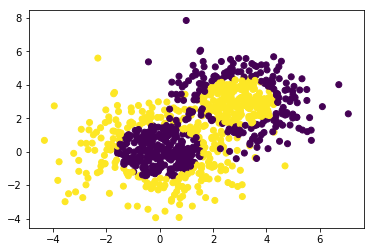

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

In [6]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME.R",
                         n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

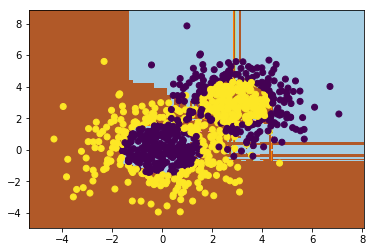

In [7]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [8]:
print("Score:", bdt.score(X,y))

Score: 1.0


In [9]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.9622222222222222


In [10]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.8944444444444445


In [11]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=600, learning_rate=0.7)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.9611111111111111


## 用adaboost做一下手写数字识别

In [31]:
import keras
from keras.datasets import mnist

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [33]:
#把二位的图片灰度值矩阵拉平 并且做一个归一化/255
x_train=x_train.reshape(60000,28*28)/255
x_test=x_test.reshape(10000,28*28)/255

In [34]:
# y_train = keras.utils.to_categorical(y_train,10) #自带独热编码功能
# y_test = keras.utils.to_categorical(y_test,10) #自带独热编码功能


In [35]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [55]:
bdt2 = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=300)
bdt2.fit(x_train, y_train)
bdt2

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=300, random_state=None)

In [56]:
print("train Score:", bdt2.score(x_train,y_train))
print("test Score:", bdt2.score(x_test,y_test))

train Score: 1.0
test Score: 0.8766


In [57]:
print("类别",bdt2.classes_)
print("弱分类器",bdt2.base_estimator_)
print("迭代次数 多少个树？",bdt2.n_estimators)


类别 [0 1 2 3 4 5 6 7 8 9]
弱分类器 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
迭代次数 多少个树？ 300


In [58]:
count=0
predict_res_list = bdt2.predict(x_test)
for j in range(len(predict_res_list)):
    if predict_res_list[j]==y_test[j]:
        count+=1
print(count)


8766
